In [1]:
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data_path = '../input/Teste4/'
geo_model = gp.create_model('SyntheitcBasinTeste4')

In [3]:
gp.init_data(geo_model,
             extent=[0, 100, 0, 150, -10, 15],
             resolution=[50, 50, 50],
             path_i=data_path + "surface_points.csv",
             path_o=data_path + "orientations_points.csv")

Active grids: ['regular']


SyntheitcBasinTeste4  2023-03-03 15:01

In [4]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Formation1,Default series,1,#015482,1
1,Formation2,Default series,2,#9f0052,2
2,Formation3,Default series,3,#ffbe00,3
3,Formation4,Default series,4,#728f02,4
4,Formation5,Default series,5,#443988,5
5,Formation6,Default series,6,#ff3f20,6
6,Fault1,Default series,7,#5DA629,7
7,basement,Basement,1,#4878d0,8


In [5]:
gp.map_stack_to_surfaces(geo_model,
                         {"Fault_Series": 'Fault1',
                          "Strat_Series": ('Formation1', 'Formation2',
                                           'Formation3', 'Formation4', 'Formation5', 'Formation6', 'basement')},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id
6,Fault1,Fault_Series,1,#5DA629,1
0,Formation1,Strat_Series,1,#015482,2
1,Formation2,Strat_Series,2,#9f0052,3
2,Formation3,Strat_Series,3,#ffbe00,4
3,Formation4,Strat_Series,4,#728f02,5
4,Formation5,Strat_Series,5,#443988,6
5,Formation6,Strat_Series,6,#ff3f20,7
7,basement,Strat_Series,7,#4878d0,8


In [6]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Erosion,False,False,False
Strat_Series,2,Erosion,False,False,False


In [7]:
geo_model.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,False,True,False
Strat_Series,2,Erosion,False,False,False


In [8]:
geo_model.grid

Grid Object. Values: 
array([[  1.  ,   1.5 ,  -9.75],
       [  1.  ,   1.5 ,  -9.25],
       [  1.  ,   1.5 ,  -8.75],
       ...,
       [ 99.  , 148.5 ,  13.75],
       [ 99.  , 148.5 ,  14.25],
       [ 99.  , 148.5 ,  14.75]])

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


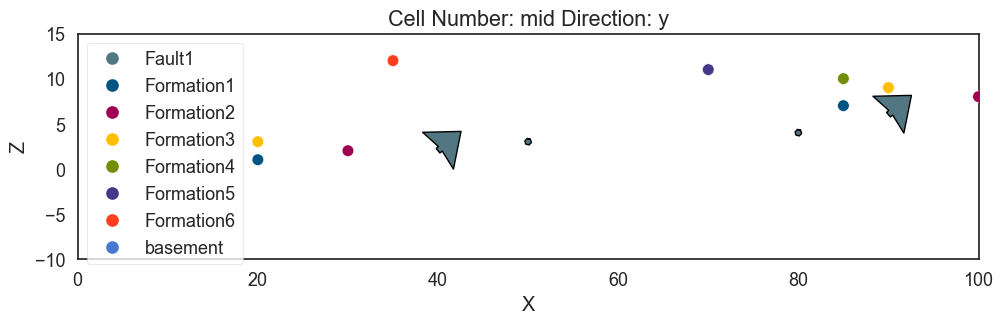

In [9]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False)
plt.show()

In [10]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


In [11]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                      values
range            182.002747
$C_o$            788.690476
drift equations      [3, 3]


In [14]:
gp.plot_3d(geo_model)

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '
